<a href="https://colab.research.google.com/github/g-an24/Track/blob/master/Traffic_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [51]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout , Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random



In [0]:
np.random.seed(0)

In [54]:
with open('german-traffic-signs/train.p', 'rb') as f :
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f :
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f :
  test_data = pickle.load(f)

print(type(train_data))
X_train, y_train  = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

<class 'dict'>


In [55]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the images is not 32 X 32 X 3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the images is not 32 X 32 X 3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the images is not 32 X 32 X 3"

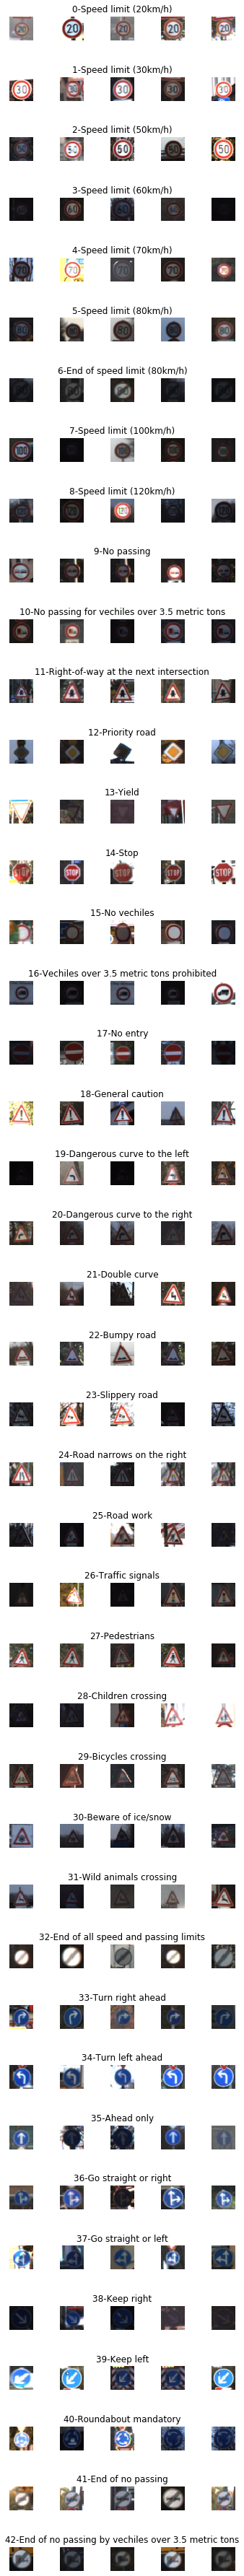

In [57]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []

cols = 5
num_classes= 43

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected)- 1)), :, :], cmap = plt.get_cmap('gray')) 
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


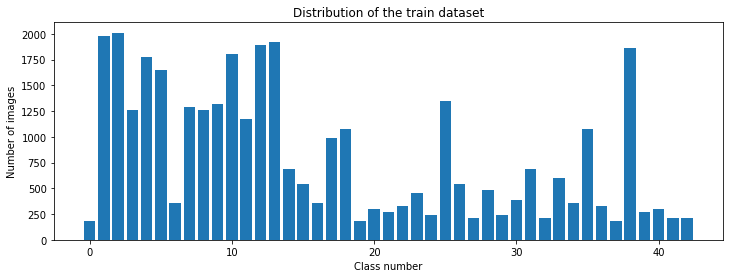

In [58]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()



(32, 32, 3)
36


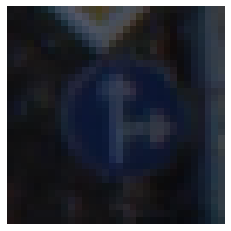

In [59]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


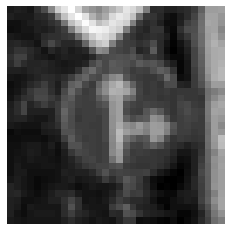

In [60]:
def grayscale(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image

image = grayscale(X_train[1000])
plt.imshow(image, cmap = plt.get_cmap("gray"))
plt.axis("off")
print(image.shape)

(32, 32)


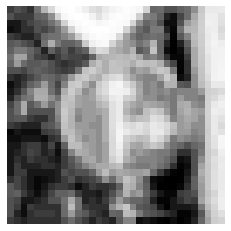

In [61]:
def equalize(image):
  image = cv2.equalizeHist(image)
  return image

image = equalize(image)
plt.imshow(image, cmap = plt.get_cmap("gray"))
plt.axis("off")
print(image.shape)

In [0]:
def preprocessing(image):
  image = grayscale(image)
  iamge = equalize(image)
  image = image/255 
  return image

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


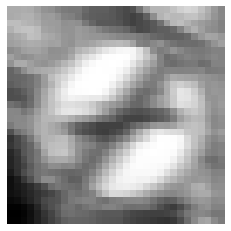

In [63]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)], cmap = plt.get_cmap("gray"))
plt.axis("off")
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
datagen.fit(X_train)

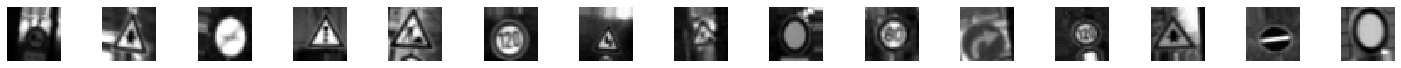

In [66]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32), cmap = plt.get_cmap("gray"))
  axs[i].axis("off")

In [67]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
  model.add(Conv2D(60, (5, 5), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(30, (3, 3), activation = 'relu'))
  model.add(Conv2D(30, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  #model.add(Dropout(0.5))

  model.add(Flatten()) 
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  #Compile model
  model.compile(Adam(lr = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])
  return model

In [78]:
model = modified_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 480)              

In [79]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50), steps_per_epoch = 2000, epochs = 10, validation_data = (X_val, y_val), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 60s 30ms/step - loss: 1.0245 - acc: 0.7089 - val_loss: 0.1234 - val_acc: 0.9651
Epoch 2/10
2000/2000 [==============================] - 58s 29ms/step - loss: 0.2213 - acc: 0.9344 - val_loss: 0.0756 - val_acc: 0.9771
Epoch 3/10
2000/2000 [==============================] - 58s 29ms/step - loss: 0.1364 - acc: 0.9587 - val_loss: 0.0458 - val_acc: 0.9880
Epoch 4/10
2000/2000 [==============================] - 57s 28ms/step - loss: 0.1017 - acc: 0.9697 - val_loss: 0.0895 - val_acc: 0.9757
Epoch 5/10
2000/2000 [==============================] - 57s 29ms/step - loss: 0.0823 - acc: 0.9757 - val_loss: 0.0891 - val_acc: 0.9812
Epoch 6/10
2000/2000 [==============================] - 59s 29ms/step - loss: 0.0748 - acc: 0.9781 - val_loss: 0.0650 - val_acc: 0.9841
Epoch 7/10
2000/2000 [==============================] - 58s 29ms/step - loss: 0.0660 - acc: 0.9809 - val_loss: 0.0509 - val_acc: 0.9873
Epoch 8/10
2000/2000 [==========================

Text(0.5, 0, 'epoch')

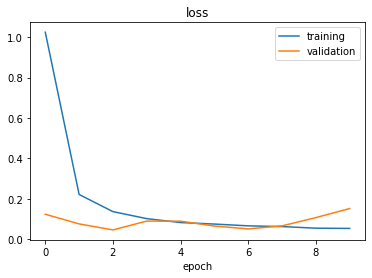

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

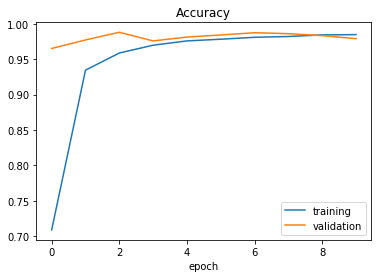

In [81]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')


In [82]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.18048760270215652
Test accuracy:  0.9733174979922702


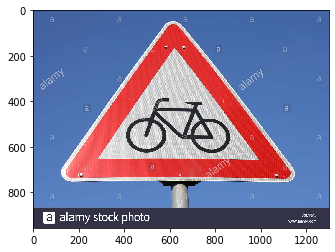

In [101]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


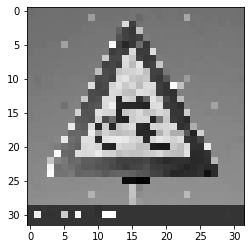

In [102]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
img = img.reshape(1, 32, 32, 1)


In [104]:
print("Predicted sign: " + str(model.predict_classes(img)))

Predicted sign: [25]
